In [7]:
import pandas as pd
adrs = "/Users/wanqiwang/Desktop/swaprate.csv"
swaprate = pd.read_csv(adrs)
swaprate['Year'] = swaprate.Tenor.str[:-3].astype('int64')
swaprate = swaprate[['Year','Ask']]
swaprate.loc[-1] = [int(0), 1.375]
swaprate['n'] = swaprate.Year*2
swaprate['n'] = swaprate.n.astype('int64')
swaprate.sort_values('n',inplace=True)
swaprate.reset_index(inplace=True, drop=True)
swaprate

,Year,Ask,n
0,0.0,1.375,0
1,1.0,1.595,2
2,2.0,1.428,4
3,3.0,1.369,6
4,4.0,1.354,8
5,5.0,1.361,10
6,6.0,1.380,12
7,7.0,1.402,14
8,8.0,1.429,16
9,9.0,1.458,18


In [8]:
rate = pd.DataFrame(swaprate)
for i in range(60): # i=6;rate.n[10] 
    if i+1 in list(rate.n):
        continue
    rate.loc[-1] = [(i+1)/2,rate.Ask[i]+(rate.Ask[i+1]-rate.Ask[i])/(rate.n[i+1]-rate.n[i]), i+1]
    rate.index += 1
    rate = rate.sort_values('n') 
    rate = rate.reset_index().iloc[:,1:]

rate.index+=1
rate2=pd.DataFrame(data=rate)
rate2

,Year,Ask,n
1,0.0,1.3750,0.0
2,0.5,1.4850,1.0
3,1.0,1.5950,2.0
4,1.5,1.5115,3.0
5,2.0,1.4280,4.0
6,2.5,1.3985,5.0
7,3.0,1.3690,6.0
8,3.5,1.3615,7.0
9,4.0,1.3540,8.0
10,4.5,1.3575,9.0


In [9]:
rate2['spot']=rate2.Ask[rate2.Year==0]
for i in range(1,61):
    t = 100 - sum([rate2.Ask[i]/2/(1+rate2.spot[j]/200)**rate2.n[j] for j in range(1,i)])
    rate2.spot[i]=200*(((100+rate2.Ask[i]/2)/t)**(1/i)-1)

In [10]:
rate2

,Year,Ask,n,spot
1,0.0,1.3750,0.0,1.375000
2,0.5,1.4850,1.0,1.490554
3,1.0,1.5950,2.0,1.603863
4,1.5,1.5115,3.0,1.519887
5,2.0,1.4280,4.0,1.435308
6,2.5,1.3985,5.0,1.405622
7,3.0,1.3690,6.0,1.375740
8,3.5,1.3615,7.0,1.368360
9,4.0,1.3540,8.0,1.360892
10,4.5,1.3575,9.0,1.364759


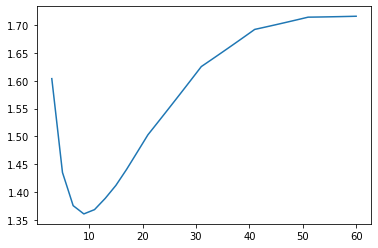

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(rate2.spot[2:]) 

In [12]:
rate2.to_csv('SpotCurveSwaps.csv')